<a href="https://colab.research.google.com/github/MichaelGeremy/Advanced-Classiffication-Hackathon-/blob/main/hotel_Reservation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Introduction

## Overview of the project

This project aims to analyze a hotel reservation dataset containing bookings made over multiple years at a large hotel chain. By leveraging SQL to query the data, we can gain valuable insights into patterns and trends. These insights will help the hotel optimize operations, understand customer behavior, improve revenue management strategies, and enhance the overall guest experience.

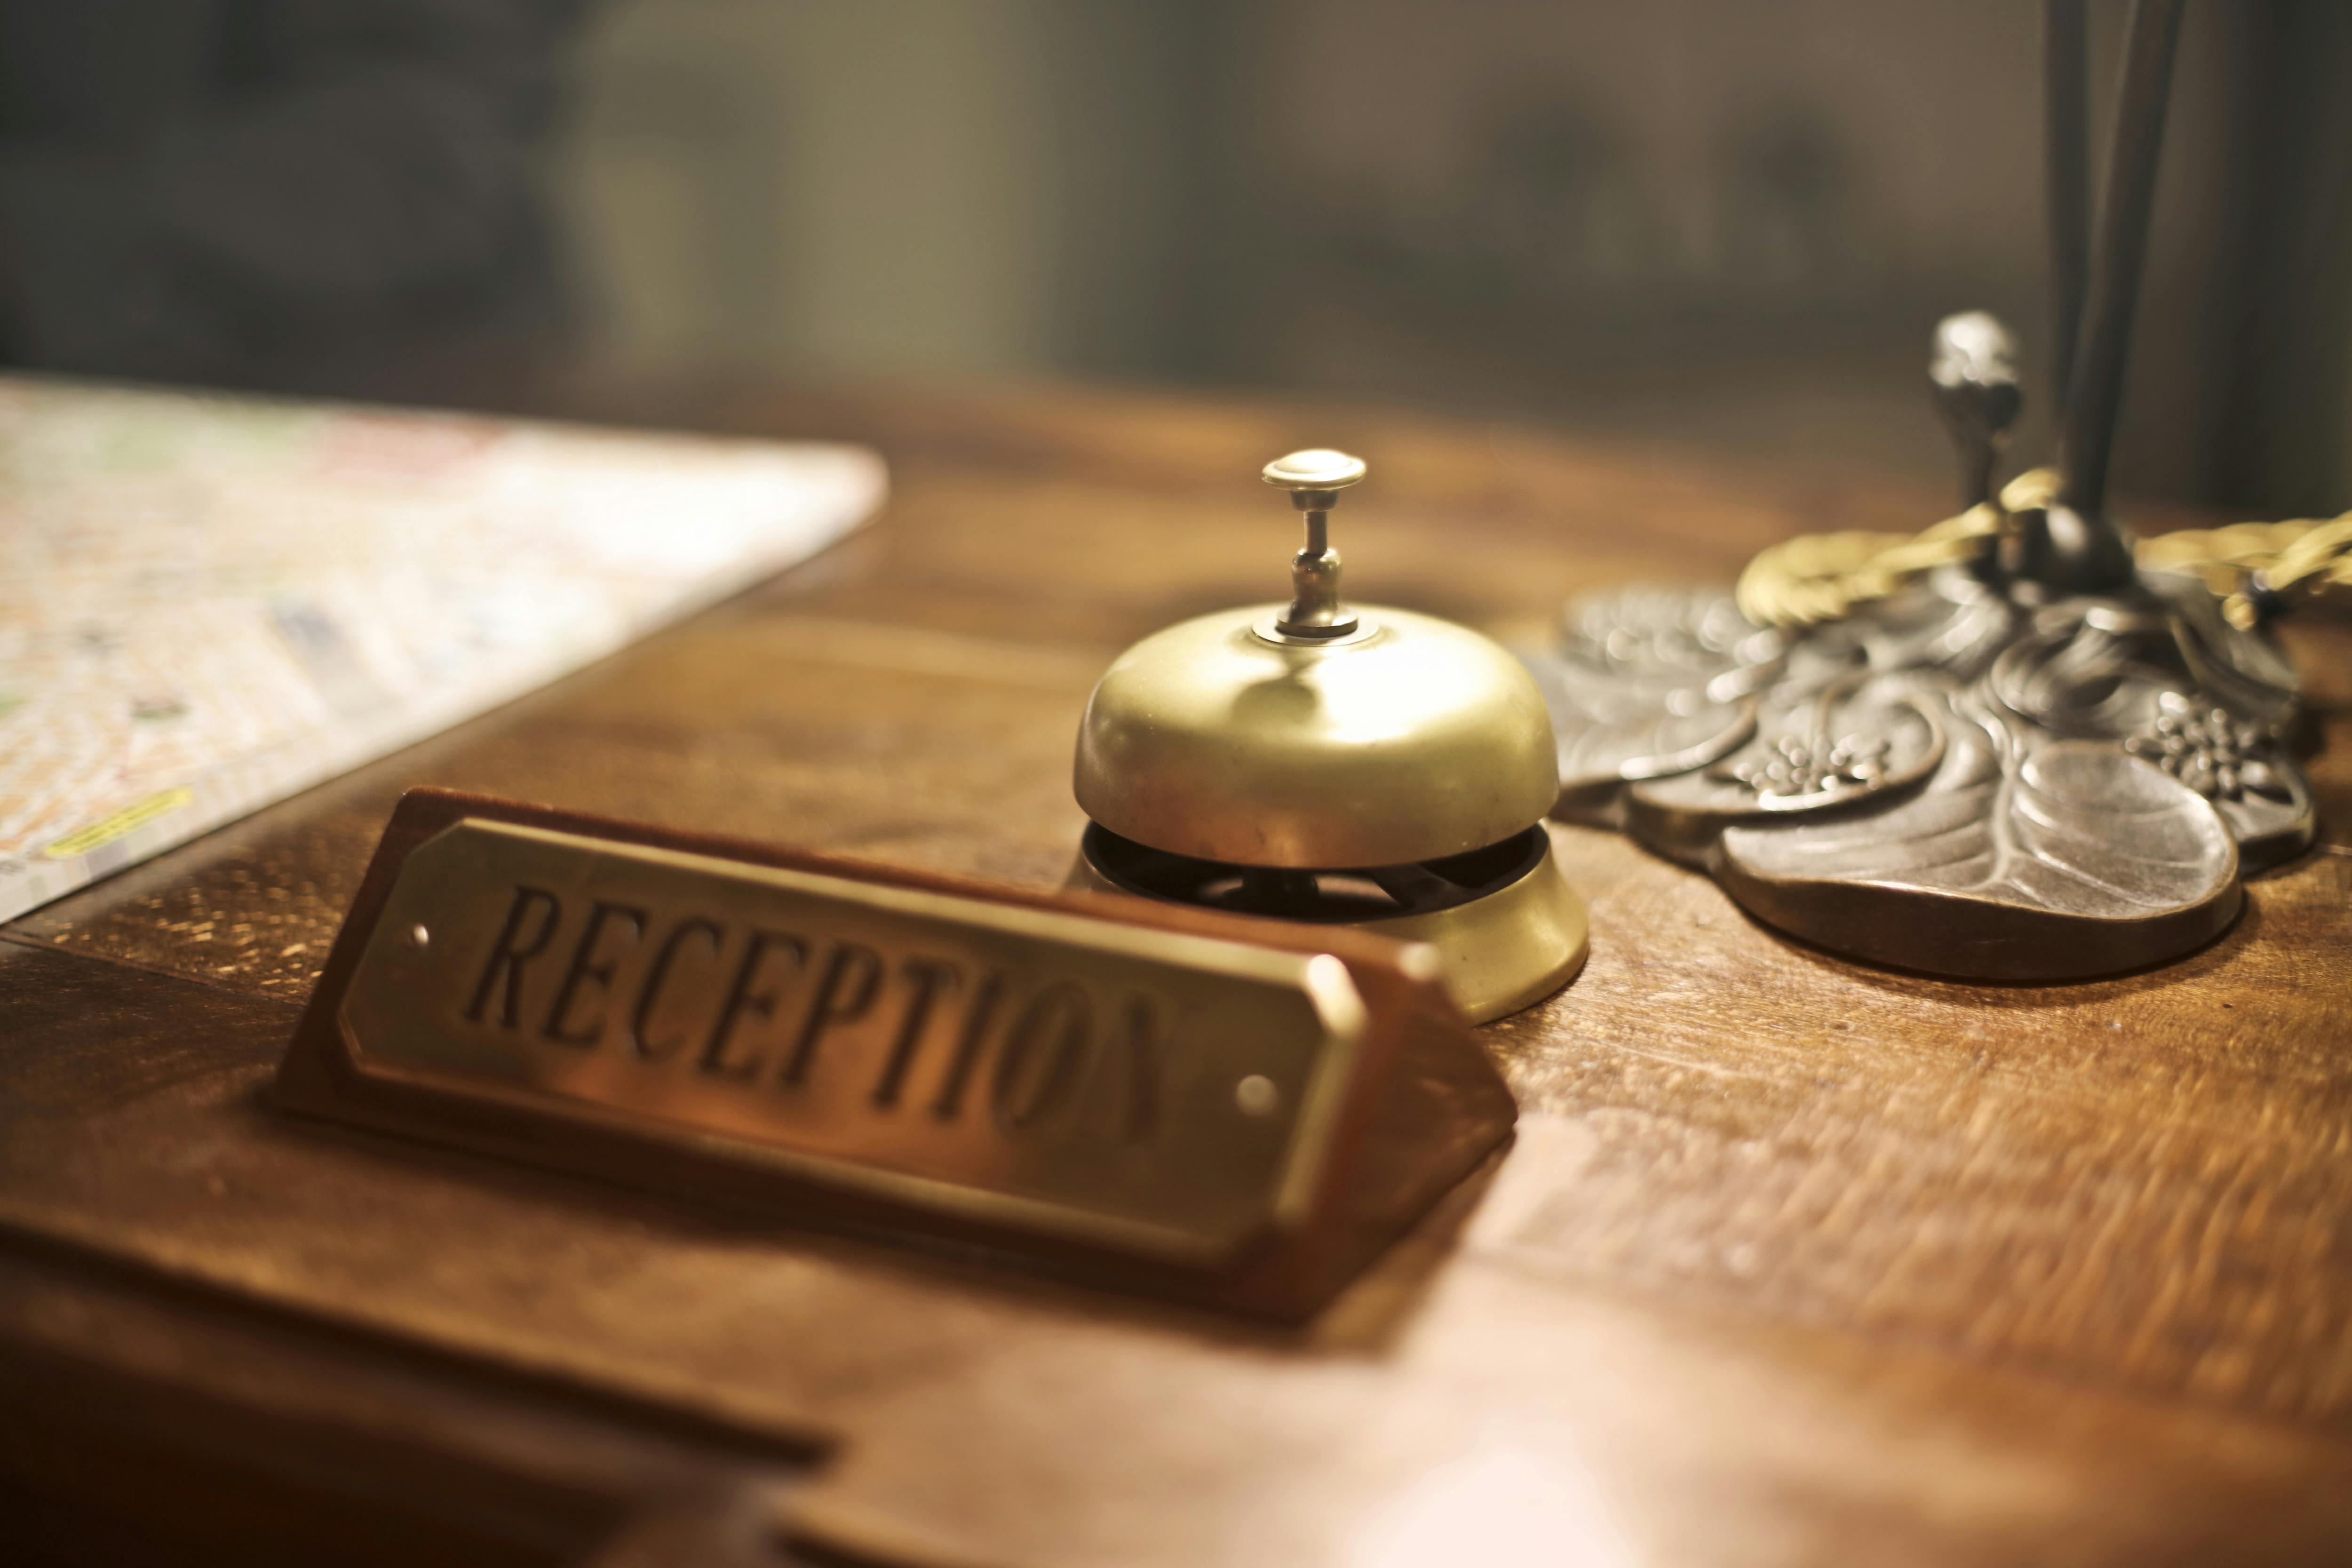

# Dataset Details:
The dataset includes the following columns:


1.	Booking_ID: A unique identifier for each hotel reservation.
2.	no_of_adults: The number of adults in the reservation.
3.	no_of_children: The number of children in the reservation.
4.	no_of_weekend_nights: The number of nights in the reservation that fall on weekends.
5.	no_of_week_nights: The number of nights in the reservation that fall on weekdays.
6.	type_of_meal_plan: The meal plan chosen by the guests.
7.	room_type_reserved: The type of room reserved by the guests.
8.	lead_time: The number of days between booking and arrival.
9.	arrival_date: The date of arrival.
10.	market_segment_type: The market segment to which the reservation belongs.
11.	avg_price_per_room: The average price per room in the reservation.
12.	booking_status: The status of the booking.



In [1]:
! pip install ipython-sql


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.0 MB/s eta 0:00:00


In [2]:
!pip install sqlite3

ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3


In [3]:
%load_ext sql

In [4]:
import sqlite3

In [5]:
%sql  sqlite:///hotel_db.sqlite

In [6]:
from google.colab import drive

In [7]:
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:


conn = sqlite3.connect('/content/hotel_db.sqlite')


In [9]:
import pandas as pd

hotel_data = pd.read_csv('/content/drive/MyDrive/Hotel_Reservation_Dataset.csv')

In [10]:
hotel_data.to_sql('hotel_data1', conn, if_exists='replace', index=False)

700

In [11]:

# Commit the changes to the database
conn.commit()



In [12]:
conn.execute("SELECT name FROM sqlite_master WHERE type='table'").fetchall()

[('hotel_data1',)]

In [13]:
# Converting this to a dataframe

hotel_df = pd.read_sql_query("SELECT * FROM hotel_data1", conn)


In [14]:
# Show the elements of hotel_df

hotel_df


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,room_type_reserved,lead_time,arrival_date,market_segment_type,avg_price_per_room,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,Room_Type 1,224,02-10-2017,Offline,65.00,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,Room_Type 1,5,06-11-2018,Online,106.68,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,Room_Type 1,1,28-02-2018,Online,60.00,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,Room_Type 1,211,20-05-2018,Online,100.00,Canceled
4,INN00005,2,0,1,1,Not Selected,Room_Type 1,48,11-04-2018,Online,94.50,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...
695,INN00696,2,0,0,2,Meal Plan 2,Room_Type 1,257,01-07-2017,Online,101.50,Canceled
696,INN00697,2,0,2,4,Not Selected,Room_Type 1,207,28-07-2018,Online,80.75,Not_Canceled
697,INN00698,2,0,2,2,Meal Plan 1,Room_Type 1,108,25-12-2018,Online,104.00,Not_Canceled
698,INN00699,2,0,0,3,Not Selected,Room_Type 1,39,15-03-2018,Online,51.19,Not_Canceled


In [15]:
# Saving the df to the database as  table

hotel_df.to_sql('hotel_data', conn, if_exists='replace', index=False)


700

## Querying the SQL Database

1. What is the total number of reservations in the dataset?

In [16]:
# The total number of reservations in the dataset

%sql SELECT COUNT(*) AS total_reservations FROM hotel_data


 * sqlite:///hotel_db.sqlite
Done.


total_reservations
700


2. Which meal plan is the most popular among guests?

In [17]:
# Which meal plan is the most popular among guests

%sql SELECT type_of_meal_plan, COUNT(*) AS total_reservations FROM hotel_data GROUP BY type_of_meal_plan ORDER BY total_reservations DESC LIMIT 1


 * sqlite:///hotel_db.sqlite
Done.


type_of_meal_plan,total_reservations
Meal Plan 1,527


3. What is the average price per room for reservations involving children?

In [18]:
# The average price per room for reservations involving children


%sql SELECT AVG(avg_price_per_room) AS average_price_with_children FROM hotel_data WHERE no_of_children > 0


 * sqlite:///hotel_db.sqlite
Done.


average_price_with_children
144.56833333333336


4. How many reservations were made for the year 20XX (replace XX with the desired year)?

In [19]:
# Reservations were made for the year 2020
%%sql
SELECT COUNT(*) AS reservations_in_2018
FROM hotel_data
WHERE substr(arrival_date, 7, 4) = '2018';


 * sqlite:///hotel_db.sqlite
Done.


reservations_in_2018
577


5. What is the most commonly booked room type?

In [20]:
# The most commonly booked room type

%sql SELECT room_type_reserved, COUNT(*) AS total_bookings FROM hotel_data GROUP BY room_type_reserved ORDER BY total_bookings DESC LIMIT 1


 * sqlite:///hotel_db.sqlite
Done.


room_type_reserved,total_bookings
Room_Type 1,534


6. How many reservations fall on a weekend (no_of_weekend_nights > 0)?

In [21]:
# Reservations that fall on a weekend (no_of_weekend_nights > 0)

%%sql
SELECT COUNT(*) AS weekend_reservations
FROM hotel_data
WHERE no_of_weekend_nights > 0;


 * sqlite:///hotel_db.sqlite
Done.


weekend_reservations
383


7. What is the highest and lowest lead time for reservations?

In [22]:
# The highest and lowest lead time for reservations

%sql SELECT MAX(lead_time) AS highest_lead_time, MIN(lead_time) AS lowest_lead_time FROM hotel_data


 * sqlite:///hotel_db.sqlite
Done.


highest_lead_time,lowest_lead_time
443,0


8. What is the most common market segment type for reservations?

In [23]:
# The most common market segment type for reservations

%%sql
SELECT market_segment_type, COUNT(*) AS total_reservations
FROM hotel_data
GROUP BY market_segment_type
ORDER BY total_reservations DESC
LIMIT 1;


 * sqlite:///hotel_db.sqlite
Done.


market_segment_type,total_reservations
Online,518


9. How many reservations have a booking status of "Confirmed"?

In [24]:
# Reservations have a booking status of Confirmed
# Confirmed is noted by Not_Canceled

%sql SELECT COUNT(*) AS confirmed_reservations FROM hotel_data WHERE booking_status = 'Not_Canceled';


 * sqlite:///hotel_db.sqlite
Done.


confirmed_reservations
493


10. What is the total number of adults and children across all reservations?

In [25]:
# The total number of adults and children across all reservations

%sql SELECT SUM(no_of_adults) AS total_adults, SUM(no_of_children) AS total_children FROM hotel_data


 * sqlite:///hotel_db.sqlite
Done.


total_adults,total_children
1316,69


11. What is the average number of weekend nights for reservations involving children?

In [26]:
# The average number of weekend nights for reservations involving children

%sql SELECT AVG(no_of_weekend_nights) AS average_weekend_nights_with_children FROM hotel_data WHERE no_of_children > 0


 * sqlite:///hotel_db.sqlite
Done.


average_weekend_nights_with_children
1.0


12. How many reservations were made in each month of the year?

In [31]:
%%sql
WITH months AS (
  SELECT 1 AS month_num, '01' AS month_value, 'January' AS month_name
  UNION ALL SELECT 2, '02', 'February'
  UNION ALL SELECT 3, '03', 'March'
  UNION ALL SELECT 4, '04', 'April'
  UNION ALL SELECT 5, '05', 'May'
  UNION ALL SELECT 6, '06', 'June'
  UNION ALL SELECT 7, '07', 'July'
  UNION ALL SELECT 8, '08', 'August'
  UNION ALL SELECT 9, '09', 'September'
  UNION ALL SELECT 10, '10', 'October'
  UNION ALL SELECT 11, '11', 'November'
  UNION ALL SELECT 12, '12', 'December'
)
SELECT
  m.month_name,
  COALESCE(r.num_reservations, 0) AS num_reservations
FROM months m
LEFT JOIN (
  SELECT
    COUNT(*) AS num_reservations,
    substr(arrival_date, 4, 2) AS month_value
  FROM hotel_data
  GROUP BY substr(arrival_date, 4, 2)
) r ON m.month_value = r.month_value
ORDER BY m.month_num;

 * sqlite:///hotel_db.sqlite
Done.


month_name,num_reservations
January,11
February,28
March,52
April,67
May,55
June,84
July,44
August,70
September,80
October,103


13. What is the average number of nights (both weekend and weekday) spent by guests for each room
type?

In [32]:
# The average number of nights (both weekend and weekday) spent by guests for each room type


%sql SELECT room_type_reserved, AVG(no_of_weekend_nights + no_of_week_nights) AS avg_nights_by_room_type FROM hotel_data GROUP BY room_type_reserved


 * sqlite:///hotel_db.sqlite
Done.


room_type_reserved,avg_nights_by_room_type
Room_Type 1,2.8782771535580522
Room_Type 2,3.0
Room_Type 4,3.8
Room_Type 5,2.5
Room_Type 6,3.611111111111111
Room_Type 7,2.6666666666666665


14. For reservations involving children, what is the most common room type, and what is the average
price for that room type?

In [36]:
%%sql
# Most common room type and the average price for that room type
WITH most_common_room_type AS (
  SELECT room_type_reserved
  FROM hotel_data
  WHERE no_of_children > 0
  GROUP BY room_type_reserved
  ORDER BY COUNT(*) DESC
  LIMIT 1
)
SELECT
  mcrt.room_type_reserved AS most_common_room_type,
  avg_price.average_price
FROM most_common_room_type mcrt
CROSS JOIN (
  SELECT AVG(avg_price_per_room) AS average_price
  FROM hotel_data
  WHERE no_of_children > 0
    AND room_type_reserved = (
      SELECT room_type_reserved
      FROM most_common_room_type
    )
) avg_price;

 * sqlite:///hotel_db.sqlite
Done.


most_common_room_type,average_price
Room_Type 1,123.12291666666665


15. Find the market segment type that generates the highest average price per room.

In [37]:
# Market segment type that generates the highest average price per room.

%sql SELECT market_segment_type, AVG(avg_price_per_room) AS average_price FROM hotel_data GROUP BY market_segment_type ORDER BY average_price DESC LIMIT 1


 * sqlite:///hotel_db.sqlite
Done.


market_segment_type,average_price
Online,112.45521235521232
